## Singular Value Decomposition SVD

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha)

In [32]:
def matrixToPlot(matrix, vectorsCol=['#FF9A13', '#1190FF']):
    """
    Modify the unit circle and basis vector by applying a matrix.
    Visualize the effect of the matrix in 2D.

    Parameters
    ----------
    matrix : array-like
        2D matrix to apply to the unit circle.
    vectorsCol : HEX color code
        Color of the basis vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure containing modified unit circle and basis vectors.
    """
    # Unit circle
    x = np.linspace(-1, 1, 100000)
    y = np.sqrt(1-(x**2))

    # Modified unit circle (separate negative and positive parts)
    x1 = matrix[0,0]*x + matrix[0,1]*y
    y1 = matrix[1,0]*x + matrix[1,1]*y
    x1_neg = matrix[0,0]*x - matrix[0,1]*y
    y1_neg = matrix[1,0]*x - matrix[1,1]*y

    # Vectors
    u1 = [matrix[0,0],matrix[1,0]]
    v1 = [matrix[0,1],matrix[1,1]]

    plotVectors([u1, v1], cols=[vectorsCol[0], vectorsCol[1]])

    plt.plot(x1, y1, 'g', alpha=0.5)
    plt.plot(x1_neg, y1_neg, 'g', alpha=0.5)

Unit circle:


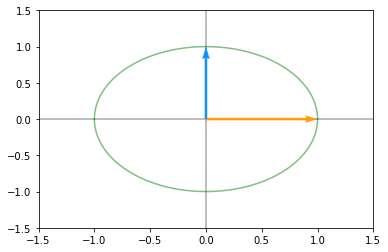

Unit circle transformed by A:


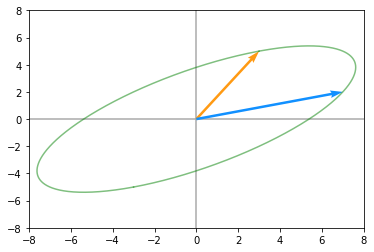

In [33]:
A = np.array([[3, 7], [5, 2]])

print ('Unit circle:')
matrixToPlot(np.array([[1, 0], [0, 1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print ('Unit circle transformed by A:')
matrixToPlot(A)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

In [34]:
U, D, Vtrans = np.linalg.svd(A)
U

array([[-0.85065081, -0.52573111],
       [-0.52573111,  0.85065081]])

In [35]:
D

array([8.71337969, 3.32821489])

In [36]:
Vtrans

array([[-0.59455781, -0.80405286],
       [ 0.80405286, -0.59455781]])

Unit circle:


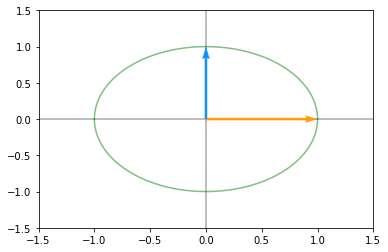

First rotation:


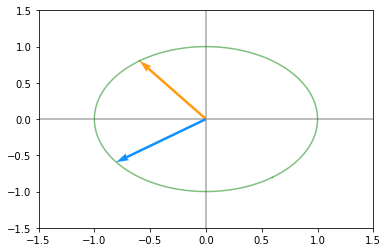

Scaling:


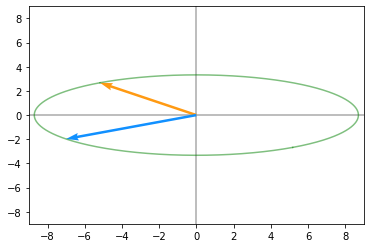

Second rotation:


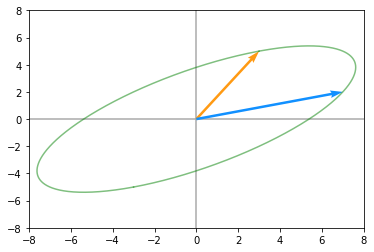

In [37]:
# Unit circle
print ('Unit circle:')
matrixToPlot(np.array([[1, 0], [0, 1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print ('First rotation:')
matrixToPlot(Vtrans)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print ('Scaling:')
matrixToPlot(np.diag(D).dot(Vtrans))
plt.xlim(-9, 9)
plt.ylim(-9, 9)
plt.show()

print ('Second rotation:')
matrixToPlot(U.dot(np.diag(D)).dot(Vtrans))
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

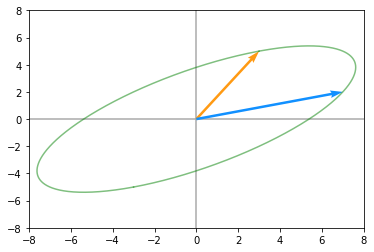

In [38]:
matrixToPlot(A)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

## Singular values interpretation
- The singular values are ordered by descending order. They correspond to a new set of features (that are a linear combination of the original features) with the first feature explaining most of the variance. For instance from the last example we can visualize these new features. The major axis of the elipse will be the first left singular vector (u1) and its norm will be the first singular value (σ1).
![image.png](attachment:image.png)

## SVD and eigendecomposition
- Now that we understand the kind of decomposition done with the SVD, we want to know how the sub-transformations are found.
- The matrices U, D and V (V here is the right singular vectors i.e. V transpose from SVD point of view) can be found by transforming A in a square matrix and by computing the eigenvectors of this square matrix. The square matrix can be obtain by multiplying the matrix A by its transpose in one way or the other:
    - U  corresponds to the eigenvectors of A @ A.T
    - V  corresponds to the eigenvectors of A.T @ A
    - D  corresponds to the square root of eigenvalues A @ A.T or A.T @ A which are the same.

### Find SVD for the matrix A:
$$\begin{bmatrix} 7 & 2 \\ 3 & 4 \\ 5 & 3 \end{bmatrix}$$

In [44]:
A = np.array([[7,2],
              [3,4],
              [5,3]])
U, D, Vtrans = np.linalg.svd(A)
print(f"D:\n{D} \n\nU:\n{U} \n\nV.T:\n{Vtrans}")

D:
[10.25142677  2.62835484] 

U:
[[-0.69366543  0.59343205 -0.40824829]
 [-0.4427092  -0.79833696 -0.40824829]
 [-0.56818732 -0.10245245  0.81649658]] 

V.T:
[[-0.88033817 -0.47434662]
 [ 0.47434662 -0.88033817]]


#### Find the eigenvectors for A @ A.T and compare with the U obtained from SVD.

In [40]:
# The left-singular values
eignval , eigvec = np.linalg.eig(A @ A.T)
eigvec

array([[-0.69366543, -0.59343205, -0.40824829],
       [-0.4427092 ,  0.79833696, -0.40824829],
       [-0.56818732,  0.10245245,  0.81649658]])

##### Find the square root of the eigenvalues for A @ A.T and compare with D obtained from SVD

In [46]:
# The nonzero singular values
np.sqrt(eignval)

array([10.25142677,  2.62835484])

#### Find the eigenvectors for  A.T @ A and compare with the V obtained from SVD.

In [47]:
# The right-singular values
eignval , eigvec = np.linalg.eig( A.T @ A)
eigvec

array([[ 0.88033817, -0.47434662],
       [ 0.47434662,  0.88033817]])

##### Find the square root of the eigenvalues for A.T @ A and compare with D obtained from SVD

In [48]:
# The nonzero singular values
np.sqrt(eignval)

array([10.25142677,  2.62835484])

### Apply the SVD on images
- We will use the SVD to extract the more important features from the image
- Let’s start by loading an image in python and convert it to a Numpy array. We will convert it to grayscale to have one dimension per pixel. The shape of the matrix corresponds to the dimension of the image filled with intensity values: 1 cell per pixel.

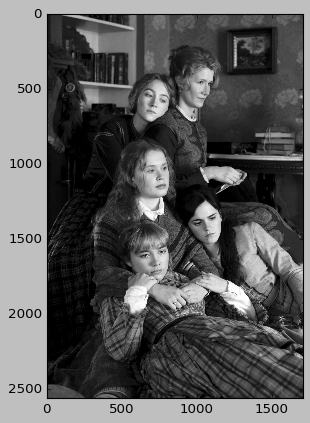

In [51]:
from PIL import Image

plt.style.use('classic')
img = Image.open('little women.jpg')
# convert image to grayscale
imggray = img.convert('LA')
# convert to numpy array
imgmat = np.array(list(imggray.getdata(band=0)), float)
# Reshape according to orginal image dimensions
imgmat.shape = (imggray.size[1], imggray.size[0])

plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()

### Find SVD for the image data matrix (imgmat) and check the chape of the matrices (imgmat, U, D, and V)

In [52]:
U, D, Vtrans = np.linalg.svd(imgmat)

In [53]:
imgmat.shape

(2560, 1707)

### Remember that D are the singular values that need to be put into a diagonal matrix. Also, V doesn’t need to be transposed 

#### The singular vectors and singular values are ordered with the first ones corresponding to the more variance explained. For this reason, using just the first few singular vectors and singular values will provide the reconstruction of the principal elements of the image.

### Reconstruct the image from the first 2 principal components
### Try reconstruct the image from higher number of principal components and see the difference

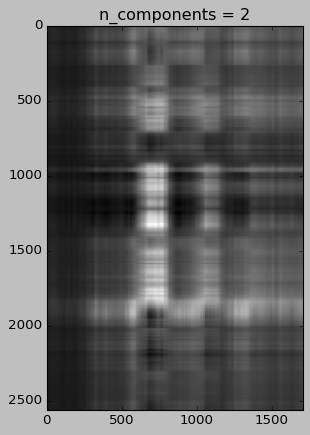

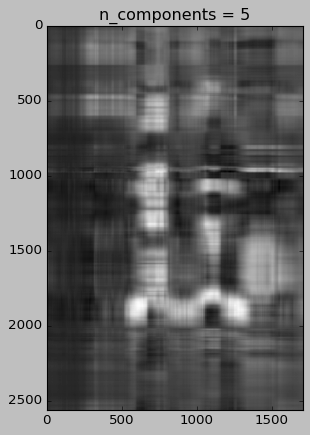

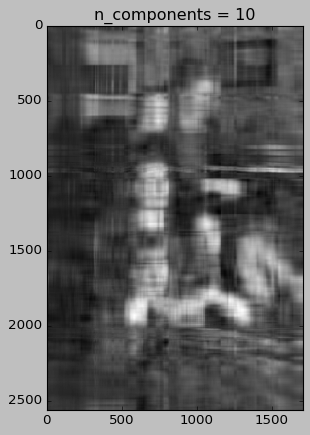

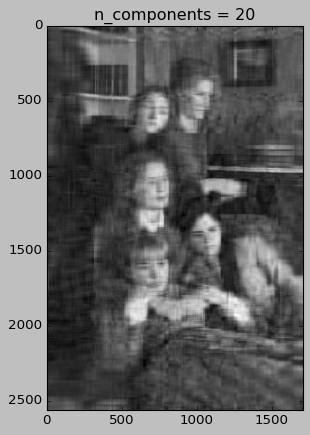

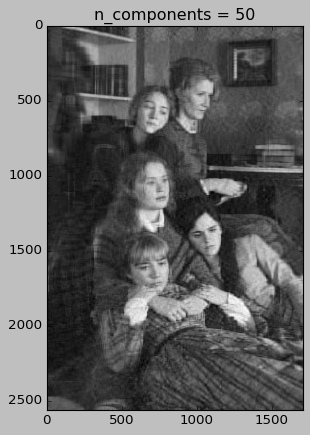

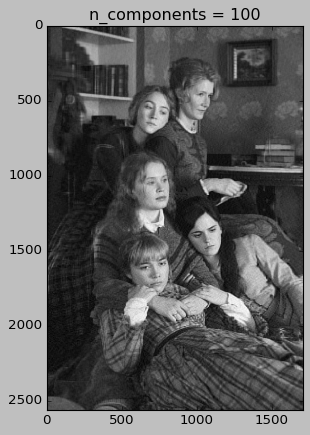

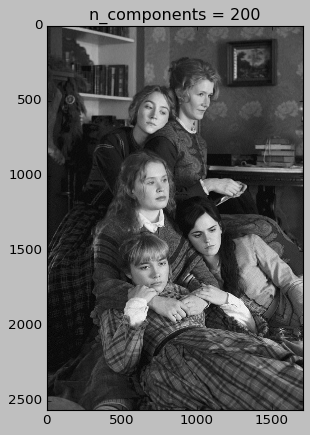

In [54]:
pcs = [2,5,10,20,50,100,200]
i = 0
for pc in pcs:
  imgmat = U[:, :pc] @ np.diag(D[:pc]) @ Vtrans[:pc, :]
  plt.imshow(imgmat, cmap='gray')
  plt.title(f"n_components = {pc}")
  plt.show()